## Реализация перцептрона


###  Подготовка датасета


* Импорт необходимых модулей


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

* Скачивание и обработка датасета.


In [2]:
url = (
    "https://archive.ics.uci.edu/ml/"
    "machine-learning-databases/iris/iris.data"
)

data = pd.read_csv(url, header=None, encoding="utf-8")

* Вывод части датасета


In [3]:
data.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


* Подготовка целей и образцов для обучения


In [4]:
X = data.iloc[:100, [0, 2]].values

y = data.iloc[:100, 4].values
y = np.where(y == "Iris-setosa", 1, 0)

* Разделение данных на обучающие и тестовые


In [5]:
X_train, X_final = (
    np.concatenate([X[:25], X[-25:]]),
    np.concatenate([X[25:50], X[50:75]]),
)

y_train, y_final = (
    np.concatenate([y[:25], y[-25:]]),
    np.concatenate([y[25:50], y[50:75]]),
)

### Реализация класса перцептрона


In [6]:
class Perceptron:
    """
    Перцептрон для классификации данных.

    Параметры:
    eta: float
        Скорость обучения перцептрона.

    n_iter: int
        Кол-во эпох обучения перцептрона.

    random_state: int
        Сид для генератора случайных чисел.

    Атрибуты:
    w_: 1d-array
        Веса перцептрона.

    b_: Scalar
        Смещение для вводного входа.

    errors_counter: list, size=n_iter
        Список числа ошибок в каждой эпохе.
    """

    def __init__(
        self,
        eta: float = 0.1,
        n_iter: int = 50,
        random_state: int = 1,
    ) -> None:
        """
        Инициализация перцептрона.

        Входные значения:
        eta: float
            Скорость обучения перцептрона.

        n_iter: int
            Кол-во эпох обучения перцептрона.

        random_state: int
            Сид для генератора случайных чисел.

        Выходные значения:
            None
        """
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(
        self,
        X_train: np.array,
        y_train: np.array,
    ):
        """
        Обучение перцептрона.

        Входные значения:
        X_train: {array-like}, shape = [n_examples, n_features]
            Массив тренировочных признаков,
            n_examples - кол-во образцов,
            n_features - кол-во признаков в каждом образце.

        y_train: {array-like}, shape = [n_examples, 1]
            Массив тренировочных целей,
            n_examples - кол-во образцов.

        Выходные значения:
            self
        """
        # Создание генератора случайных чисел.
        rgen = np.random.RandomState(seed=self.random_state)

        # Весы
        self.w_ = rgen.normal(
            loc=0.0,  # Среднее значение
            scale=0.1,  # Стандартное отклонение
            size=X_train.shape[1],  # Размер матрицы весов
        )

        # Смещение
        self.b_ = np.float64(0.0)

        # Список числа ошибок на каждой эпохе.
        self.errors_counter_ = [0 for _ in range(self.n_iter)]

        # Старт обучения
        for epoch in range(self.n_iter):
            # Счётчик ошибок
            errors_cnt = 0

            for x_sample, y_target in zip(X_train, y_train):
                # Получение предсказания метки от перцептрона.
                y_predicted = self.predict(x_sample)

                # Получение значения ошибки в предсказании.
                error = self.get_error(
                    target=y_target,
                    predicted=y_predicted,
                )

                # Получение переменной отклика.
                update = self.eta * error

                # Обновление весов и смещения.
                self.w_ += update * x_sample
                self.b_ += update

                # Обновление счетчика ошибок.
                errors_cnt += int(update != 0.0)

            # Добавление кол-ва ошибок в список счетчиков ошибок.
            self.errors_counter_[epoch] = errors_cnt

        return self

    def get_error(
        self,
        target,
        predicted,
    ):
        """
        Получения значения ошибки при измерении.

        Входные значения:
        target
            Целевое значение предсказания.

        predicted
            Предсказанное значение перцептрона.

        Выход:
            Scalar
        """
        return target - predicted

    def get_net_input(
        self,
        x_sample,
    ):
        """
        Вычисление фактического значения ввода.
        """
        return np.dot(x_sample, self.w_) + self.b_

    def predict(
        self,
        x_sample,
    ):
        """
        Предсказание метки класса на основе фактического ввода.
        """
        return np.where(
            self.get_net_input(x_sample) >= 0.0,
            1,
            0,
        )

### Реализация отрисовки кол-ва ошибок


In [7]:
class PlotErrors:
    """Объект рисовальщика, для отрисовки кол-ва ошибок"""

    def __init__(
        self,
        errors_counter: list,
        xlabel: str,
        ylabel: str,
    ) -> None:
        """Инициализация рисовальщика

        Args:
            errors_counter (list): список кол-ва ошибок.
            xlabel (str): название для оси x.
            ylabel (str): название для оси y.
        """
        self.errors_counter = errors_counter
        self.xlabel = xlabel
        self.ylabel = ylabel

    def draw(self):
        """Реализация отрисовки"""
        plt.plot(
            range(1, len(self.errors_counter) + 1),
            self.errors_counter,
            marker="o",
        )

        plt.xlabel(self.xlabel)
        plt.ylabel(self.ylabel)

        plt.show()

### Тестировка перцептрона


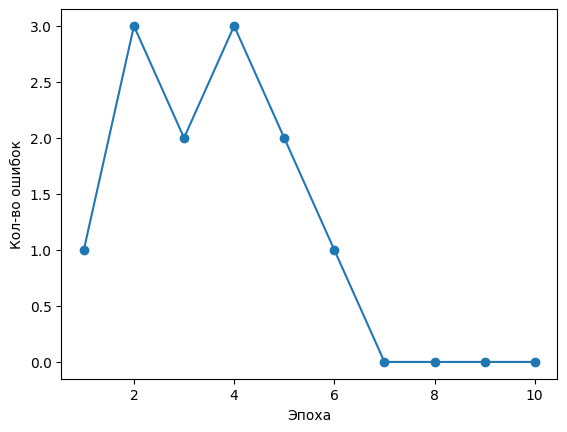

In [8]:
ppn = Perceptron(n_iter=10, eta=0.1)
ppn.fit(X_train=X_train, y_train=y_train)

plot_errors = PlotErrors(
    ppn.errors_counter_,
    "Эпоха",
    "Кол-во ошибок",
)
plot_errors.draw()

* Проверка на контрольной выборке


In [9]:
final_errors_cnt = 0

for x_sample, y_target in zip(X_final, y_final):
    y_predicted = ppn.predict(x_sample)

    final_errors_cnt += int(y_predicted != y_target)

print(f"Кол-во ошибок на контрольной выборке: {final_errors_cnt}")

Кол-во ошибок на контрольной выборке: 0


### Дополнительная аналитика


* Функция для подсчета кол-ва ошибок


In [10]:
def get_final_errors_cnt(ppn):
    final_errors_cnt = 0

    for x_sample, y_target in zip(X_final, y_final):
        y_predicted = ppn.predict(x_sample)

        final_errors_cnt += int(y_predicted != y_target)

    return final_errors_cnt

* Отрисовка графика ошибок в зависимости от кол-ва эпох


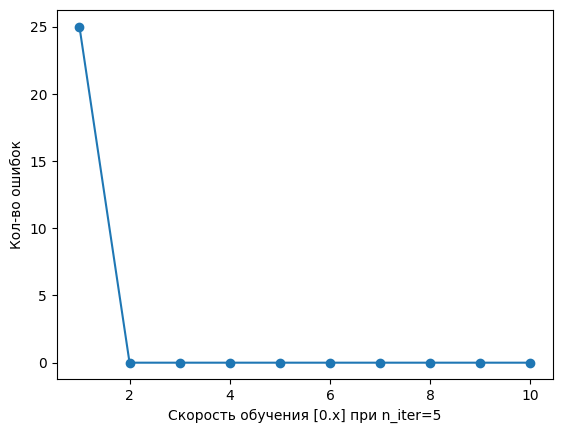

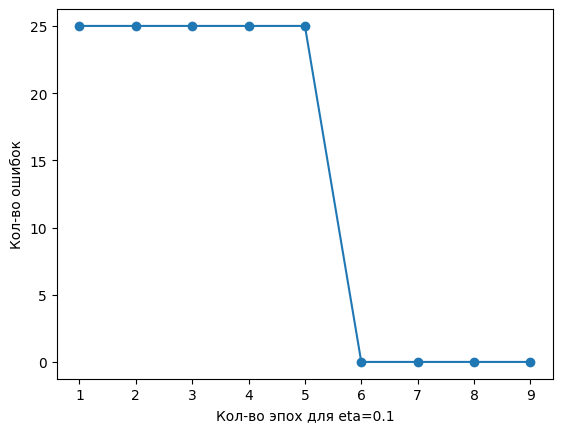

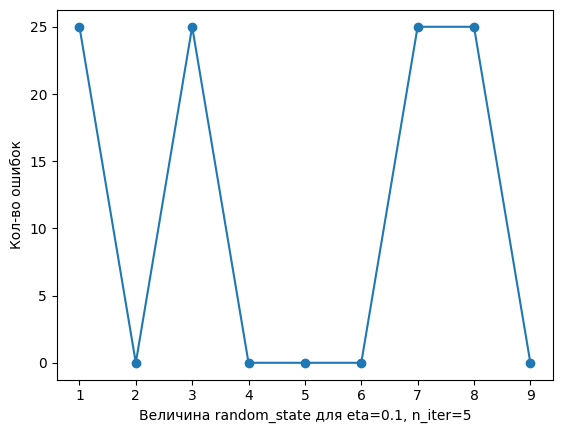

In [11]:
final_errors_list = []

for eta_size in range(10, 100 + 1, 10):
    eta = eta_size / 100
    ppn = Perceptron(eta=eta, n_iter=5)
    ppn.fit(X_train=X_train, y_train=y_train)

    final_errors_list.append(get_final_errors_cnt(ppn))

plot_errors = PlotErrors(
    errors_counter=final_errors_list,
    xlabel="Скорость обучения [0.x] при n_iter=5",
    ylabel="Кол-во ошибок",
)

plot_errors.draw()


final_errors_list = []

for epoch_cnt in range(1, 10):
    ppn = Perceptron(eta=0.1, n_iter=epoch_cnt)
    ppn.fit(X_train=X_train, y_train=y_train)

    final_errors_list.append(get_final_errors_cnt(ppn))

plot_errors = PlotErrors(
    errors_counter=final_errors_list,
    xlabel="Кол-во эпох для eta=0.1",
    ylabel="Кол-во ошибок",
)

plot_errors.draw()


final_errors_list = []

for random_state in range(1, 10):
    ppn = Perceptron(n_iter=5, eta=0.1, random_state=random_state)
    ppn.fit(X_train=X_train, y_train=y_train)

    final_errors_list.append(get_final_errors_cnt(ppn))

plot_errors = PlotErrors(
    errors_counter=final_errors_list,
    xlabel="Величина random_state для eta=0.1, n_iter=5",
    ylabel="Кол-во ошибок",
)

plot_errors.draw()

### Визуализация решающих границ для двумерных наборов данных.


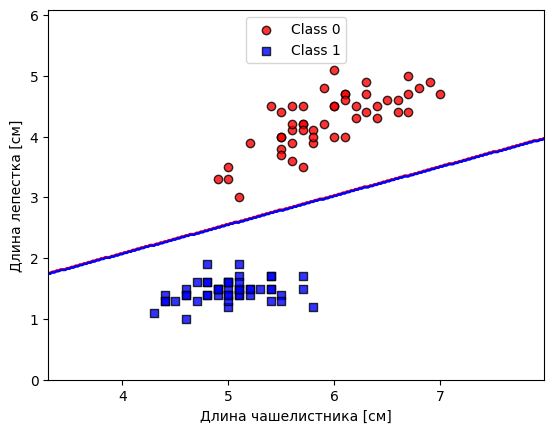

In [ ]:
from matplotlib.colors import ListedColormap

plt.show()


def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Настройка генератора меток
    markers = ["o", "s", "^", "v", "<"]
    colors = ("red", "blue", "lightgreen", "gray", "cyan")

    cmap = ListedColormap(colors[: len(np.unique(y))])

    # Варьируемость первого признака
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1

    # Варьируемость второго признака
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Координатные сетки из двух одномерных массивов
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution),
    )

    # Создание из сеток двумерной матрицы признаков.
    # Получение предсказаний на основе матрицы признаков.
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

    # Пределываем список предсказаний в матрицу той же размерности,
    # что и xx1.
    lab = lab.reshape(xx1.shape)

    # Рисуем контуры
    plt.contour(xx1, xx2, lab, alpha=0.8, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Добавляем метки существующих в наборе точек.
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=f"Class {cl}",
            edgecolor="black",
        )


plot_decision_regions(X, y, classifier=ppn)
plt.xlabel("Длина чашелистника [см]")
plt.ylabel("Длина лепестка [см]")
plt.legend(loc=9)
plt.show()